In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing

In [2]:
data = pd.read_csv('C:/Users/91797/Desktop/ProjectonLogisticRegression-1/6 - Project 2 Logistic Regression/German_Credit_data.csv')

In [3]:
data.head(5)

,Creditability,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                             Non-Null Count  Dtype
---  ------                                             --------------  -----
 0   Creditability                                      1000 non-null   int64
 1   Status_of_existing_account                         1000 non-null   int64
 2   Duration_of_Credit_month                           1000 non-null   int64
 3   Payment_Status_of_Previous_Credit(Credit_history)  1000 non-null   int64
 4   Purpose_of_loan                                    1000 non-null   int64
 5   Credit_Amount                                      1000 non-null   int64
 6   Value_of_Savings_account&bonds                     1000 non-null   int64
 7   Years_of_Present_Employment                        1000 non-null   int64
 8   Percentage_of_disposable_income                    1000 non-null   int64
 9   Sex_&_Marital_Status           

In [5]:
data.shape

(1000, 21)

In [6]:
data.Creditability.unique()

array([1, 0], dtype=int64)

In [7]:
data.Creditability.value_counts()

1    700
0    300
Name: Creditability, dtype: int64

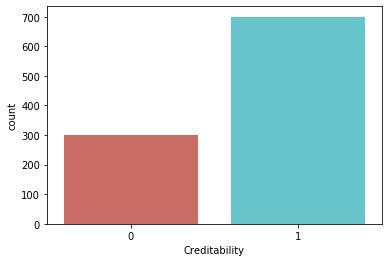

<Figure size 432x288 with 0 Axes>

In [8]:
sns.countplot(x='Creditability',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

# Without Balancing Data ( imbalance data )

In [9]:
data.nunique()

Creditability                                          2
Status_of_existing_account                             4
Duration_of_Credit_month                              33
Payment_Status_of_Previous_Credit(Credit_history)      5
Purpose_of_loan                                       10
Credit_Amount                                        923
Value_of_Savings_account&bonds                         5
Years_of_Present_Employment                            5
Percentage_of_disposable_income                        4
Sex_&_Marital_Status                                   4
Guarantors/Debtors                                     3
Duration_in_Present_Residence                          4
Property                                               4
Age_in_years                                          53
Concurrent_Credits                                     3
Housing                                                3
No_of_Credits_at_this__Bank                            4
Occupation                     

Text(0.5, 1.0, 'Purchase Frequency for Job Title')

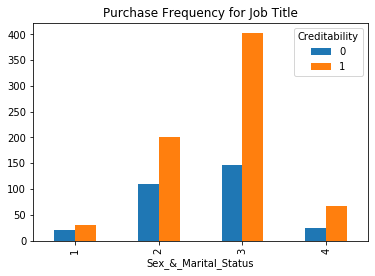

In [10]:
%matplotlib inline
pd.crosstab(data['Sex_&_Marital_Status'],data.Creditability).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')


In [11]:
data['Sex_&_Marital_Status'].unique()

array([2, 3, 4, 1], dtype=int64)

In [12]:
data

,Creditability,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,...,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1


In [13]:
data.groupby('Creditability').mean()

,Status_of_existing_account,Duration_of_Credit_month,Payment_Status_of_Previous_Credit(Credit_history),Purpose_of_loan,Credit_Amount,Value_of_Savings_account&bonds,Years_of_Present_Employment,Percentage_of_disposable_income,Sex_&_Marital_Status,Guarantors/Debtors,Duration_in_Present_Residence,Property,Age_in_years,Concurrent_Credits,Housing,No_of_Credits_at_this__Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
Creditability,,,,,,,,,,,,,,,,,,,,
0,1.903333,24.860000,2.166667,2.903333,3938.126667,1.673333,3.170000,3.096667,2.586667,1.126667,2.850000,2.586667,33.96,2.556667,1.913333,1.366667,2.936667,1.153333,1.376667,1.013333
1,2.865714,19.207143,2.707143,2.795714,2985.442857,2.290000,3.475714,2.920000,2.722857,1.152857,2.842857,2.260000,36.22,2.725714,1.934286,1.424286,2.890000,1.155714,1.415714,1.047143


In [14]:
x = data.loc[:, data.columns != 'Creditability']
y = data.loc[:, data.columns == 'Creditability']


In [15]:
x.shape,y.shape

((1000, 20), (1000, 1))

# LogisticRegression

In [16]:
lr = LogisticRegression()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 5)

In [18]:
lr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [19]:
y_pred = lr.predict(X_test)

In [20]:
y_pred[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.39      0.48        79
           1       0.76      0.89      0.82       171

    accuracy                           0.74       250
   macro avg       0.70      0.64      0.65       250
weighted avg       0.72      0.74      0.72       250



In [22]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print('Accuracy = ',acc)
score = lr.score(X_test,y_test)
print('Score =',score)

Accuracy =  0.736
Score = 0.736


# DecisionTreeClassifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
y_pred_dt = tree.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.53      0.51      0.52        79
           1       0.78      0.80      0.79       171

    accuracy                           0.70       250
   macro avg       0.66      0.65      0.65       250
weighted avg       0.70      0.70      0.70       250



In [27]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy = ',acc)
score = tree.score(X_test,y_test)
print('Score =',score)

Accuracy =  0.736
Score = 0.704


#  RandomForestClassifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

In [29]:
y_pred_rf = rf.predict(X_test)

In [30]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.63      0.42      0.50        79
           1       0.77      0.89      0.82       171

    accuracy                           0.74       250
   macro avg       0.70      0.65      0.66       250
weighted avg       0.73      0.74      0.72       250



In [31]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy = ',acc)
score = rf.score(X_test,y_test)
print('Score =',score)

Accuracy =  0.736
Score = 0.74


# Multiple Algorithms

In [32]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(750, 20)
(250, 20)
(750, 1)
(250, 1)


In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection

In [34]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))

In [35]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = None)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(name)
    print(name, cv_results.mean(), cv_results.std())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

LR 0.7573333333333334 0.04533333333333331
LDA 0.7613333333333334 0.06965310872858123


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

KNN 0.6746666666666667 0.051363627424688606
CART 0.6506666666666667 0.057441757942768054


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y wa

RF 0.7613333333333333 0.05544166103011145
NB 0.7466666666666666 0.07375635565834311


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

In [36]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred1 = LR.predict(X_test)
print('LR = ',accuracy_score(y_test, y_pred1))

DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
y_pred2 = DTC.predict(X_test)
print('DTC = ',accuracy_score(y_test, y_pred2))

RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
y_pred3 = RFC.predict(X_test)
print('RFC = ',accuracy_score(y_test, y_pred3))

KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_pred4 = KNN.predict(X_test)
print('KNN = ',accuracy_score(y_test, y_pred4))

LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)
y_pred5 = LDA.predict(X_test)
print('LDA = ',accuracy_score(y_test, y_pred5))

GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_pred6 = GNB.predict(X_test)
print('GNB = ',accuracy_score(y_test, y_pred6))

LR =  0.736
DTC =  0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example u

RFC =  0.716
KNN =  0.62
LDA =  0.724
GNB =  0.736


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# Balanced Data

In [ ]:
LR =  0.732
DTC =  0.66
RFC =  0.732
KNN =  0.596
LDA =  0.724
GNB =  0.728

In [37]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(0.5)
X_train_res,y_train_res = os.fit_sample(X_train,y_train)

C:\Users\91797\AppData\Roaming\Python\Python37\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [38]:
y_train_res.shape,X_train_res.shape

((793, 1), (793, 20))

In [39]:
LR = LogisticRegression()
LR.fit(X_train_res, y_train_res)
y_pred1 = LR.predict(X_test)
print('LR = ',accuracy_score(y_test, y_pred1))

DTC = DecisionTreeClassifier()
DTC.fit(X_train_res, y_train_res)
y_pred2 = DTC.predict(X_test)
print('DTC = ',accuracy_score(y_test, y_pred2))

RFC = RandomForestClassifier()
RFC.fit(X_train_res, y_train_res)
y_pred3 = RFC.predict(X_test)
print('RFC = ',accuracy_score(y_test, y_pred3))

KNN = KNeighborsClassifier()
KNN.fit(X_train_res, y_train_res)
y_pred4 = KNN.predict(X_test)
print('KNN = ',accuracy_score(y_test, y_pred4))

LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train_res, y_train_res)
y_pred5 = LDA.predict(X_test)
print('LDA = ',accuracy_score(y_test, y_pred5))

GNB = GaussianNB()
GNB.fit(X_train_res, y_train_res)
y_pred6 = GNB.predict(X_test)
print('GNB = ',accuracy_score(y_test, y_pred6))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example u

LR =  0.732
DTC =  0.66
RFC =  0.732
KNN =  0.596
LDA =  0.724
GNB =  0.728


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
